In [34]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data/responses.csv')
df_original=df.copy()
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
columns=df.columns.tolist()
print(columns)
for col in columns:
    print(col, df[col].dtypes)

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',

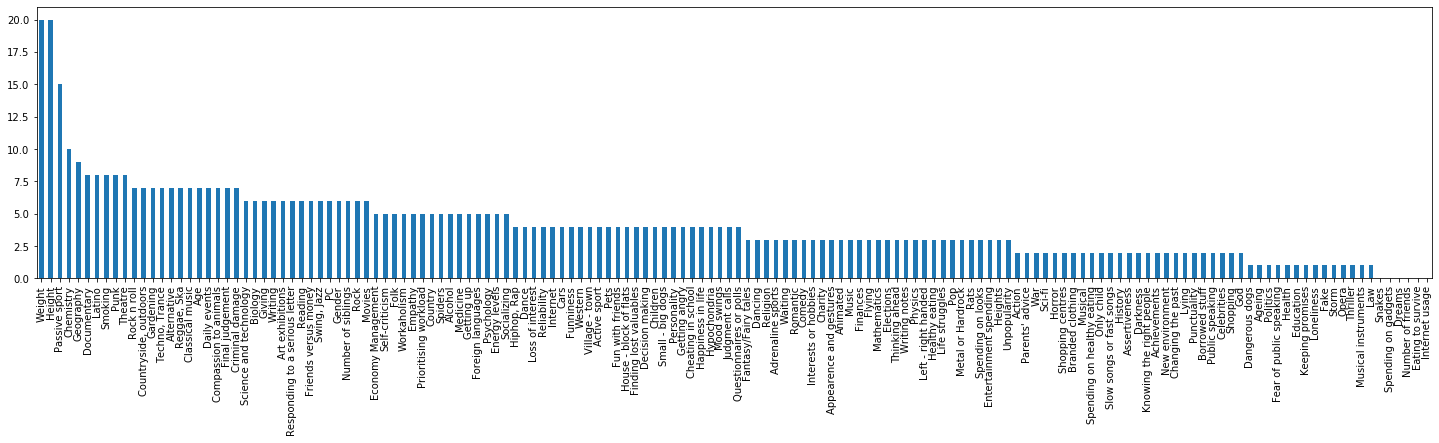

In [4]:
#number of null values per category
nulls = df.isnull().sum().sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(25, 5))

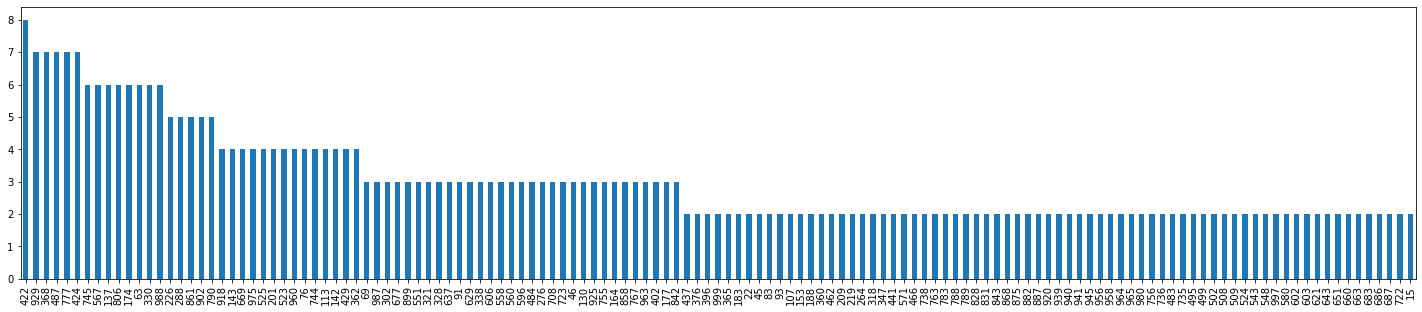

In [5]:
#number of null values per entry (more than 1 missing value)
nulls = df.isnull().sum(axis=1)[df.isnull().sum(axis=1)>1].sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(25, 5))

(array([0, 1]), <a list of 2 Text yticklabel objects>)

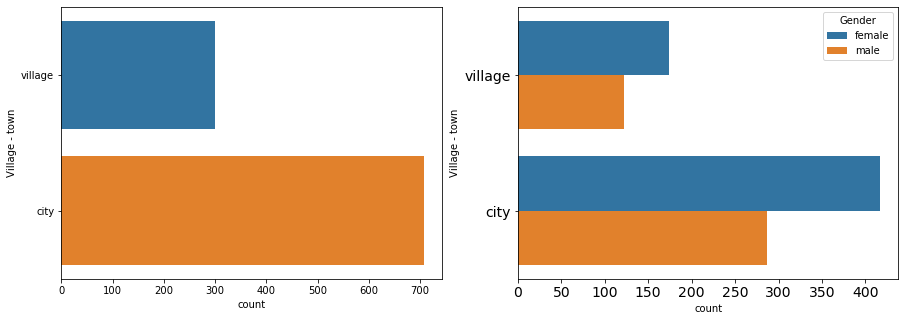

In [6]:
var_of_interest = 'Village - town'
df.dropna(subset=[var_of_interest], inplace=True)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(y=var_of_interest, data=df, ax=ax[0])
sns.countplot(y=var_of_interest, hue='Gender', data=df, ax=ax[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [13]:
#let us clean up stuff and make it numerical to get it ready for comparision, prediction tasks
df=df_original.copy()
print(df.Education.unique())
mapping = {var_of_interest: {'city': 0, 'village': 1}}
df.replace(mapping, inplace=True)

mapping_gender = {"Gender": {'male': 0, 'female': 1}}
df.replace(mapping_gender, inplace=True)

mapping_house = {"House - block of flats": {'block of flats': 0, 'house/bungalow': 1}}
df.replace(mapping_house, inplace=True)

mapping_child = {"Only child": {'no': 0, 'yes': 1}}
df.replace(mapping_child, inplace=True)

mapping_hand = {"Left - right handed": {'left handed': 0, 'right handed': 1}}
df.replace(mapping_hand, inplace=True)

mapping_smoking = {"Smoking": {'never smoked':1, 'tried smoking':2, 'former smoker':3, 'current smoker':4}}
df.replace(mapping_smoking, inplace=True)
#df.Smoking.fillna(0, inplace=True)

mapping_alc = {"Alcohol": {'drink a lot':3, 'social drinker':2, 'never':1}}
df.replace(mapping_alc, inplace=True)
#df.Alcohol.fillna(0, inplace=True)

mapping_punct = {"Punctuality": {'i am always on time':2, 'i am often early':1, 'i am often running late':3}}
df.replace(mapping_punct, inplace=True)
#df.Punctuality.fillna(0, inplace=True)

mapping_lying = {"Lying": {'never':1, 'sometimes':2, 'only to avoid hurting someone':3,'everytime it suits me':4}}
df.replace(mapping_lying, inplace=True)
#df.Lying.fillna(0, inplace=True)

mapping_internet = {"Internet usage": {'few hours a day':3,'most of the day':4,'less than an hour a day':2,'no time at all':1}}
df.replace(mapping_internet, inplace=True)
#df["Internet usage"].fillna(0, inplace=True)

mapping_education = {"Education": {'college/bachelor degree':4, 'secondary school':3, 'primary school':2,'masters degree':5, 'doctorate degree':6, 'currently a primary school pupil':1}}
df.replace(mapping_education, inplace=True)
df.Education.fillna(0, inplace=True)
print(df.Education.unique())

for c in range(2):
    print("Prozent female in",c,"is",df.Gender[df.Gender==1][df[var_of_interest]==c].sum()/(len(df.Gender[df.Gender==0][df[var_of_interest]==c])+df.Gender[df.Gender==1][df[var_of_interest]==c].sum()))

['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
[4. 3. 2. 5. 6. 1. 0.]
Prozent female in 0 is 0.5923295454545454
Prozent female in 1 is 0.5878378378378378


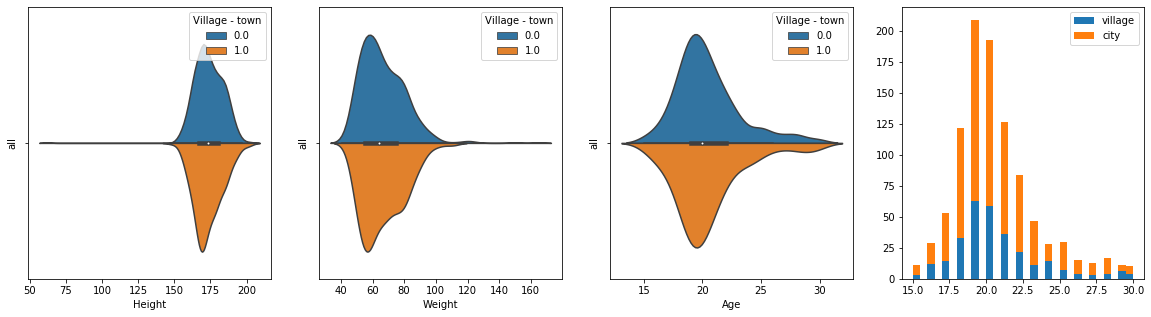

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
df["all"] = ""
data = df.dropna(subset=['Height'])
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0]);
data = df.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1]);
data = df.dropna(subset=['Age'])
sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2]);

var_of_int_ser = df[var_of_interest]
plt.hist([df[var_of_int_ser==1].Age.dropna(),df[var_of_int_ser==0].Age.dropna()],
             label=['village','city'], stacked=True, bins=30);
ax[3].legend()

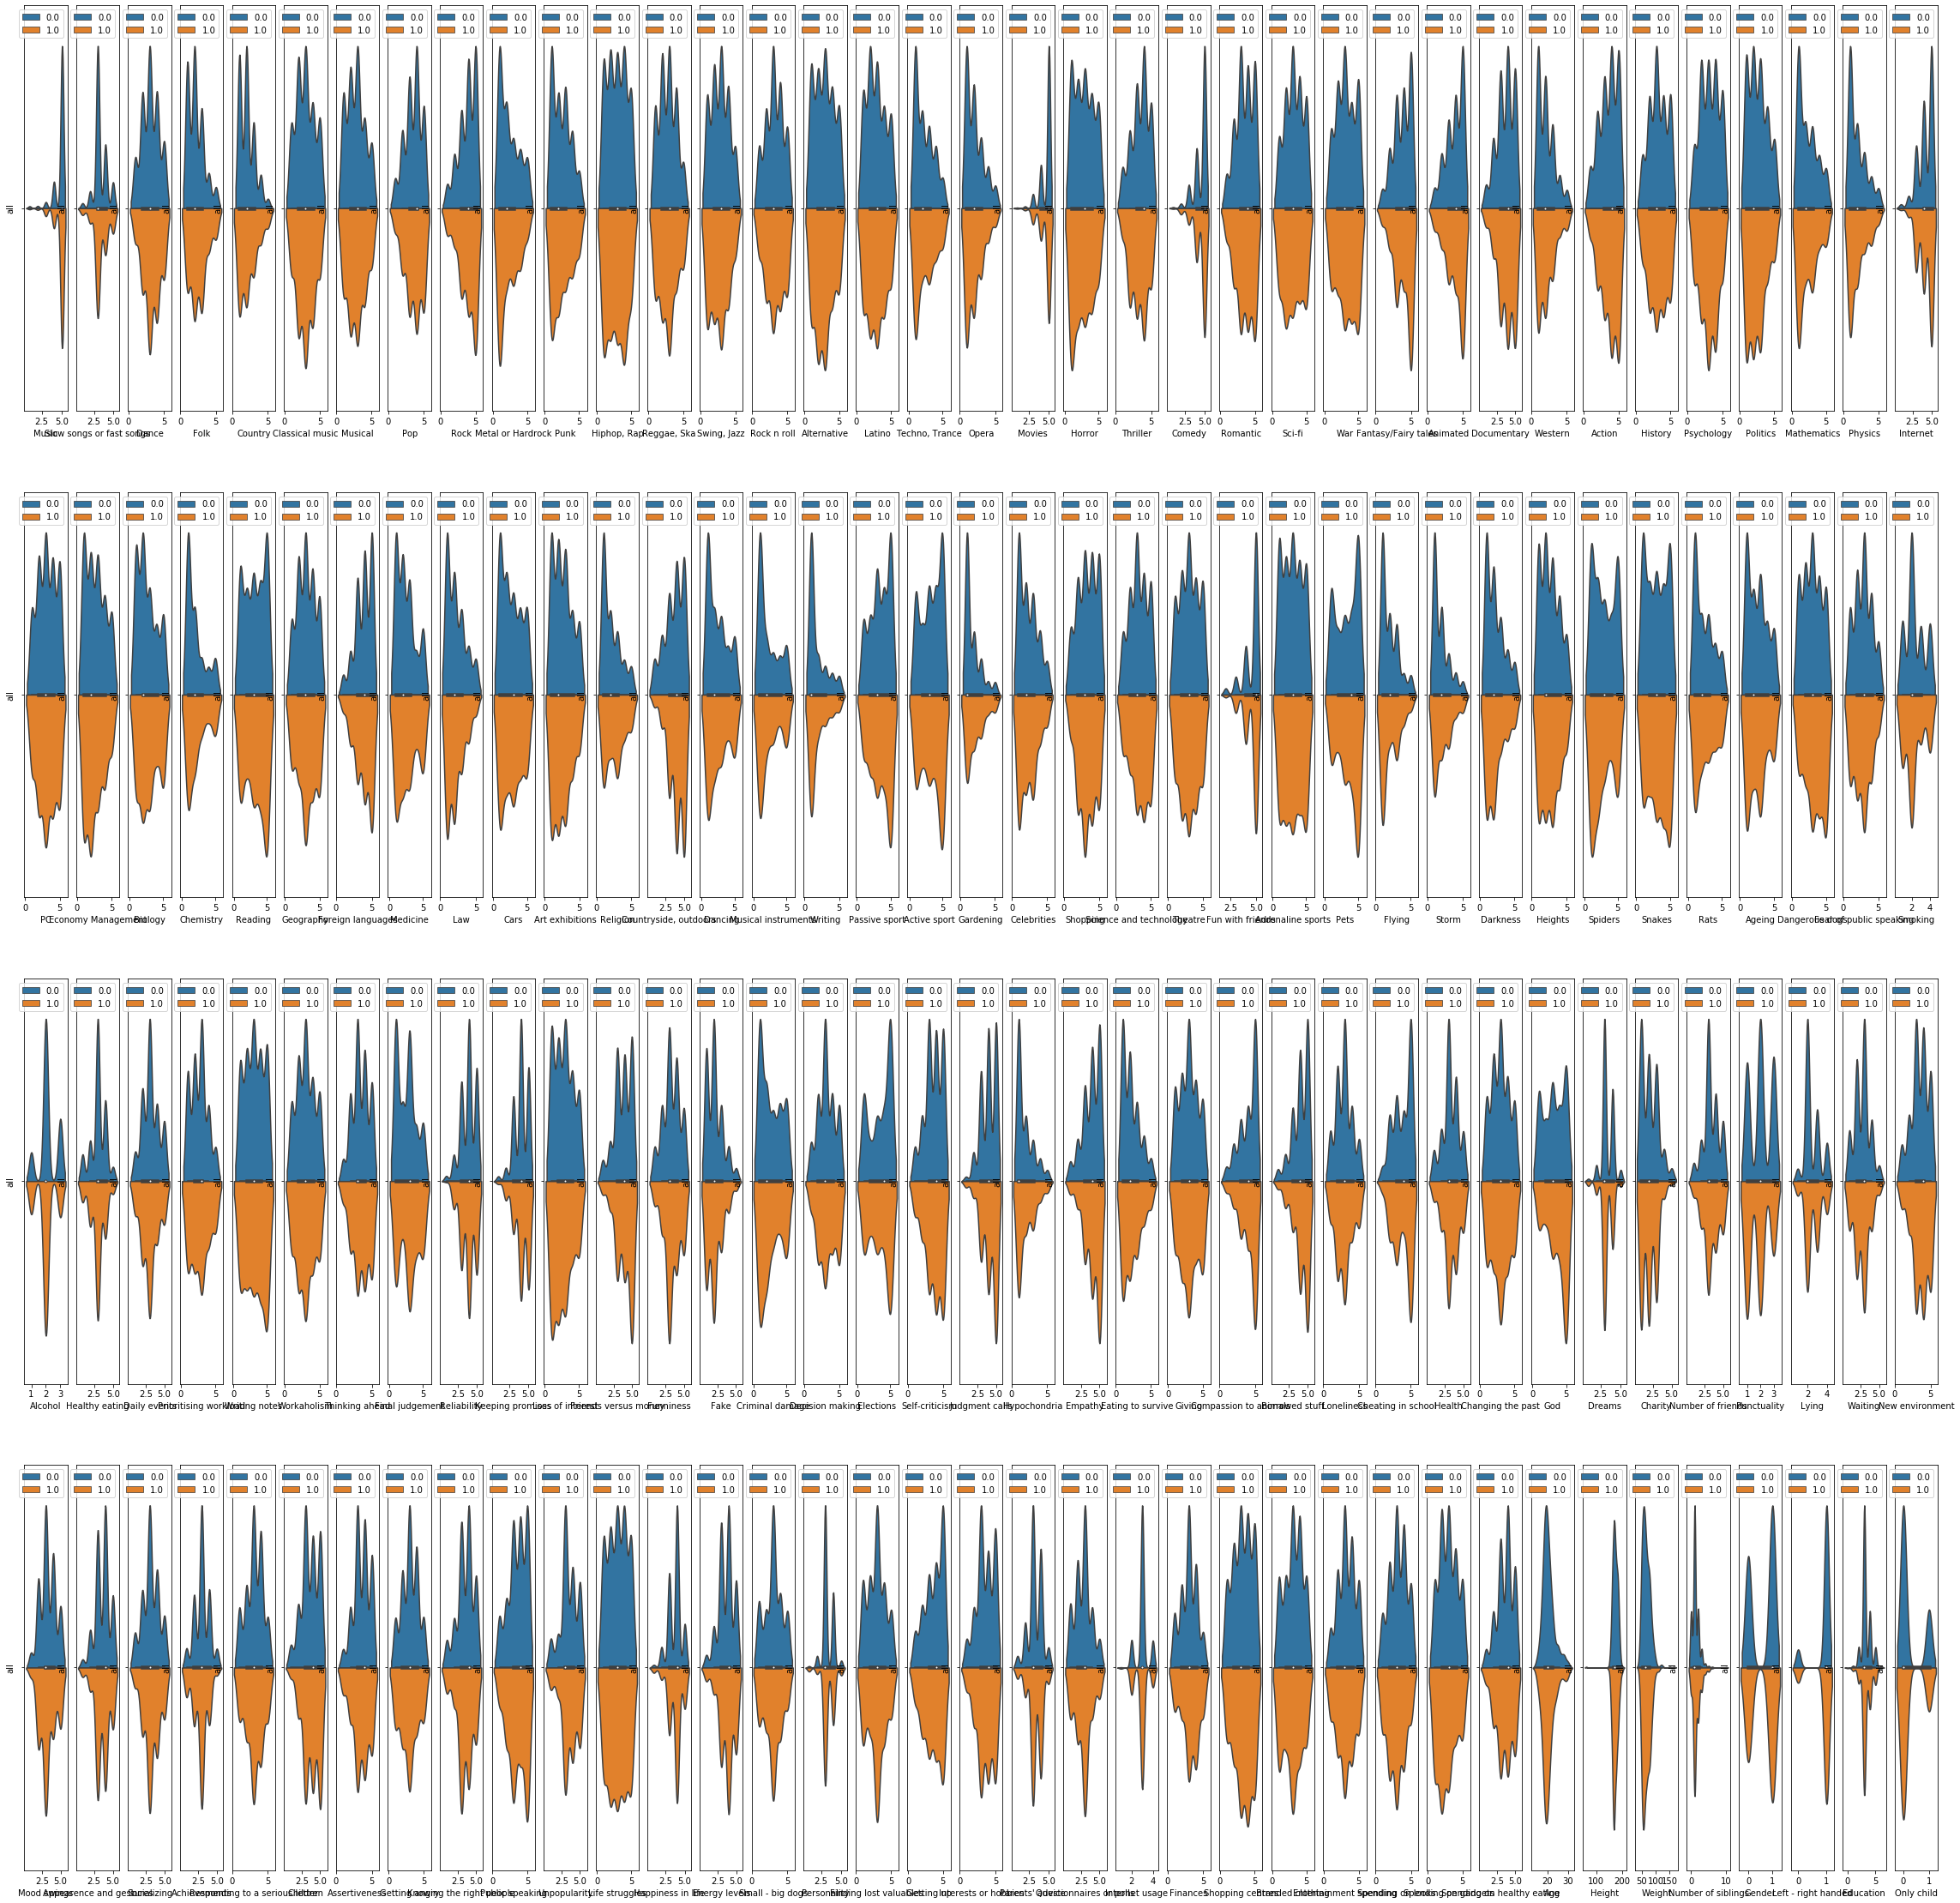

In [15]:
numerics=df.select_dtypes(include=['int64','float64','uint8','int32','bool'])
numeric_columns=numerics.columns.tolist()
numerics["all"] = ""
fig, ax = plt.subplots(nrows=4, ncols=len(columns)//4, figsize=(40,40))
for i in range(len(numeric_columns)):
    data = df.dropna(subset=[numeric_columns[i]])
    try:
        sns.violinplot(x=numeric_columns[i], y = "all", hue=var_of_interest, data=numerics, split=True, ax = ax[i//(len(columns)//4),i%(len(columns)//4)])
    except:
        continue
    ax[i//(len(columns)//4),i%(len(columns)//4)].legend()
plt.show()

                             Music  Slow songs or fast songs     Dance  \
Music                     1.000000                  0.100207  0.081572   
Slow songs or fast songs  0.100207                  1.000000  0.196041   
Dance                     0.081572                  0.196041  1.000000   
Folk                      0.031212                 -0.060910  0.065654   
Country                  -0.007589                 -0.070274  0.058415   
...                            ...                       ...       ...   
Left - right handed       0.034595                  0.051903  0.026974   
Education                -0.070770                 -0.024166 -0.010851   
Only child               -0.021767                 -0.004313 -0.029584   
Village - town            0.000720                  0.007774  0.063009   
House - block of flats   -0.013585                  0.018378  0.050429   

                              Folk   Country  Classical music   Musical  \
Music                     0.031212 -

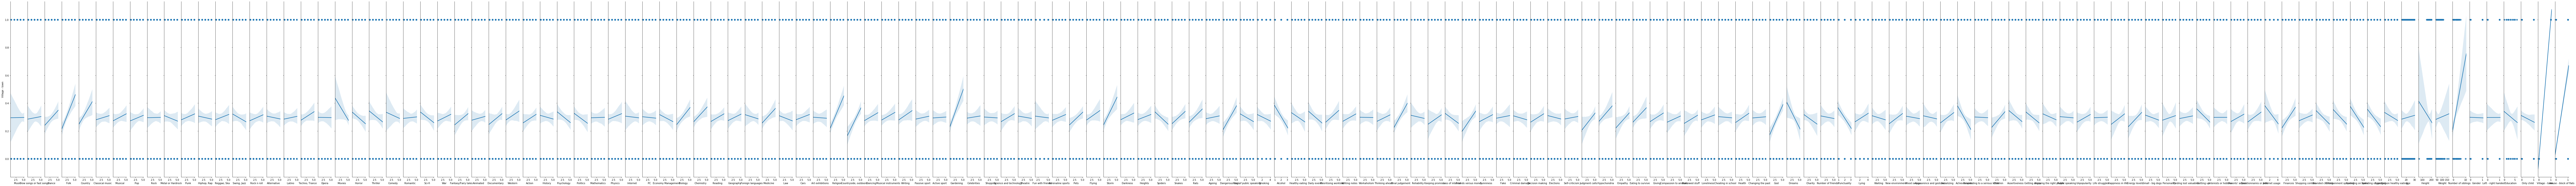

In [16]:
#exploratory analysis of correlations between variables. Don't say anything about causations when inspected like this.
print(numerics.corr())
#revenue and budget seems fairly correlated with a Spearman's correlation coefficent of 0.69 (excluding 0-values for revenue and budget in the records)
print()
#pair plot
g=sns.pairplot(data=numerics,y_vars=var_of_interest,x_vars=numeric_columns,kind="reg")
g.fig.set_size_inches(150,15)

In [40]:
numerics.drop(columns=["all"],inplace=True) #careful is happening inPlace for now
numerics.drop(columns=["Village - town"],inplace=True)

numerics.fillna(numerics.mean(),inplace=True)
print(numerics.mean())
X = np.array(numerics)
print(X)
y = np.array(df["Village - town"].fillna(0))
X_train, X_dev, y_train, y_dev=train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
clf_reg = LogisticRegressionCV(Cs=100,cv=5,solver='liblinear',class_weight='balanced',penalty='l1',scoring='roc_auc', random_state=42).fit(X_train,y_train)

Music                       4.731877
Slow songs or fast songs    3.328373
Dance                       3.113320
Folk                        2.288557
Country                     2.123383
                              ...   
Gender                      0.590637
Left - right handed         0.899702
Education                   3.283168
Only child                  0.251984
House - block of flats      0.408549
Length: 149, dtype: float64
[[5. 3. 2. ... 4. 0. 0.]
 [4. 4. 2. ... 4. 0. 0.]
 [5. 5. 2. ... 3. 0. 0.]
 ...
 [4. 3. 1. ... 3. 1. 0.]
 [5. 3. 3. ... 4. 0. 0.]
 [5. 5. 4. ... 3. 0. 1.]]


In [41]:
y_predict = clf_reg.predict(X_dev)
score = accuracy_score(y_dev, y_predict)
confusion=confusion_matrix(y_dev, y_predict)
print("Accuracy: %f" % (score))
print(confusion)

Accuracy: 0.821782
[[114  28]
 [  8  52]]


In [44]:
print(clf_reg.coef_)
sort_index = np.argsort(np.abs(clf_reg.coef_[0]))
sorted_features=[x for y, x in sorted(zip(sort_index, numerics.columns),reverse=True)]
print(sorted_features)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.61826106e-03
   2.15210284e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.21639409e-02  0.00000000e+00  0.00000000e+00
   1.18275951e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.62227822e-02  8.86466329e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.35745591e-02
  -6.63780102e-02  7.99239906e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00017604e-01  0.00000000e+00
  -3.03093295e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.45855077e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.16689526e-02
   4.35091197e-02  6.09137994e-02  0.00000000e+00  8.91129693e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.64950086e-02
  -6.27196953e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000